## 1, 데이터 다운로드

In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing") #os.path.join(path, path1, path2, ...) 넘겨준 path들을 묶어 하나의 경로로 만들어줍니다.
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True) #인자로 전달된 디렉터리를 재귀적으로 생성합니다.
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) #파일로 저장:urlretrieve()/ urlretrieve() 함수를 이용해서 파일을 직접 다운로드 할 수 있다.
    housing_tgz = tarfile.open(tgz_path) #압축 풀기
    housing_tgz.extractall(path=housing_path) #zip 파일의 모든 파일과 폴더를 현재 작업 디렉터리로 압축 해제할 수 있습니다. extractall()에 폴더명을 전달해서 특정 디렉터리의 모든 파일과 폴더를 압축 해제할 수도 있습니다. 
    housing_tgz.close()

### 코드 요약

현재 작업공간에 datasets/housing 디렉토리를 만들고 housing.tgz 파일을 내려받고 같은 디렉터리에 압축을 풀어 housing.csv 파일을 만든다. 

In [3]:
fetch_housing_data() 

In [4]:
# 판다스를 이용하여 데이터 읽어 들이기

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## 2. 데이터 구조 훑어보기

In [5]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# 데이터에 대한 간략한 설명과 전체 행수, 각 특성의 데이터 타입과 널이 아닌 값의 개수 확인

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#범주형 변수이지만 object 타입으로 되어 있다. 

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# 숫자형 특성의 요약 정보를 보여준다. 널 값이 제외되어 있다. 
# std 행은 값이 퍼져 있는 정도를 측정하는 표준편차이다. 

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


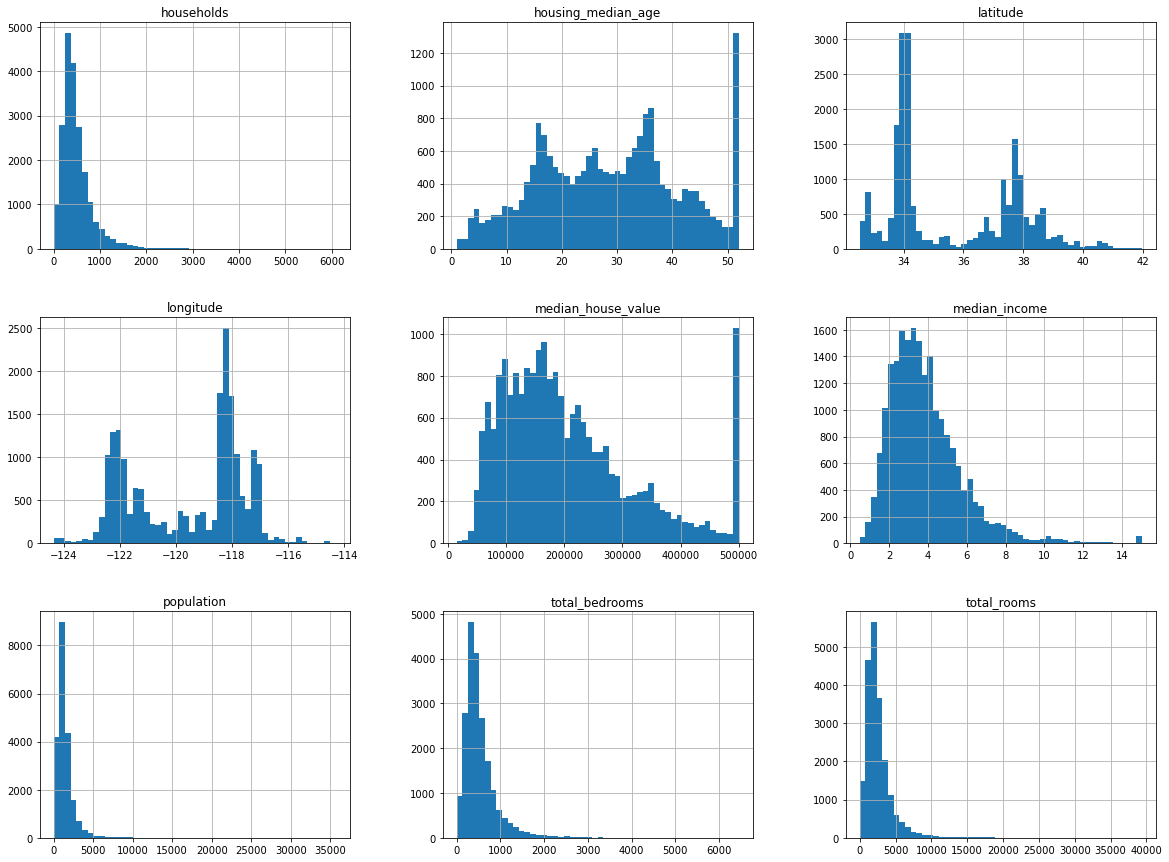

In [9]:
# 히스토그램은 주어진 값의 범위(수평축)에 속한 샘플 수(수직축)을 나타낸다. 
# 중간 주택 연도, 중간 주택 가격이 최댓값과 최솟값이 한정되어 있다. 
# 특성들의 스케일이 서로 많이 다르다. 
# 많은 히스토그램의 꼬리가 두껍고, 가운에서 왼쪽보다 오른쪽으로 더 멀리 뻗어 있다. 이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만든다. 종 모양의 분포가 되도록 변형시켜야 한다. 

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

#### 테스트 세트 만들기

데이터 텀색하는 과정에서 테스트 세트를 뗴어놓는 것은 우리가 겉으로 들어난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될지도 모르기 때문이다.

- 데이터 스누핑 편향: 테스트 세트로 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 론칭했을 때 기대한 성능이 나오지 않을 것이다. 


In [10]:
import numpy as np

def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data)) #난수 호출
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    

In [11]:
train_set,test_set=split_train_test(housing,0.2)
len(train_set)

16512

In [12]:
len(test_set)

4128

In [13]:
# 매번 다른 테스트 세트가 생성되는 것을 방지하기 위해 난수 발생기의 초깃값을 저장-> np.random.seed(42)
# 그러나 모두 다음번에 업데이트된 데이터셋을 사용하려면 문제가 되기 때문에 알정적인 훈련/ 테스트 분할을 위해 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정해야 한다.

from zlib import crc32

def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier))&0xfffffff<test_ratio*2**32 #파이썬과 호환성을 유지하기 위해 비트 연산

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
housing_with_id = housing.reset_index()   # 식별자 칼럼이 없어 행의 인덱스를 ID로 사용. `index` 열이 추가된 데이터프레임을 반환합니다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [15]:
# 위도와 경도는 몇백 년후까지 안정적이라고 보장할 수 있지만 정밀도가 낮아 여러 구역이 ID가 동일해지므로 같은 테스트 세트 혹은 훈련세트에 들어가게 된다.
# 즉 원치 않은 샘플링 편향이 만들어질 수 있다. 

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

### sklearn  데이터셋 나누는 방법

1. 난수 초깃값을 저장할 수 있는 random_state 매개변수가 있다.

2. 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있다. 
(데이터프레임이 레이브렝 따라 여러 개로 나뉘어 있을때 매우 유용)

In [16]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [17]:
# 중간 소득이 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야 한다. 
# 너무 많은 계측으로 나누면 안되고, 각 계층이 충분히 커야 한다. 

housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5]) # 배열 요소를 int로 변환

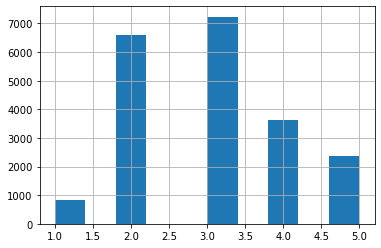

In [18]:
housing["income_cat"].hist()

In [19]:
# 소득 카테고리 기반으로 계층 샘플링
# StratfiedShuffleSplit() 함수는 각 층의 비율을 고려해 무작위로 train/test set을 분할할 수 있는 index 를 반환하며, 이 index를 이용해서 train set, test set을 indexing 하는 작업을 추가로 해줘야 합니다.
# 1개의 train/ test set 만을 분할하므로 n_splits=1 로 지정해주며, test_size에 test set의 비율을 지정해주고, random_state에는 재현가능성을 위해 난수 초기값으로 아무값이 지정해줍니다. 


from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
#테스트 세트에서 소득 카테고리의 비율 살펴보기

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True) #axis=0이면 행 삭제/ 1이면 열 삭제

## 3. 데이터 이해를 위한 탐색과 시각화

탐색 단계는 완벽하지 않다. 시작을 잘해서 빨리 통찰을 얻는 것이 처음 프로토타입을 잘 만다는 데 도움이 된다. 
그러나 이는 반복적인 과정이다. 프로토타입을 만들고 실행한 후 그 결과를 분석해서 더 많은 통찰을 얻고 
다시 이 탐색 단계로 돌아오게 된다. 

In [22]:
# 테스트 세트를 떼어놓고, 훈련 세트에 대해서만 탐색을 진행한다. 
# 훈련 세트를 손상시키지 않기 위해 복사본을 만들어 사용한다. 

housing=strat_train_set.copy()

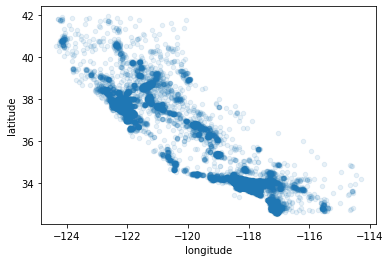

In [23]:
# 지리 정보(위도와 경도)가 있으니 모든 구역을 산점도 만들어 데이터 시각화
# alpha=0.1로 주면 데이터 포인트가 밀집된 영역을 잘 보여 준다. 
# alpha 값은 투명도를 나타내며 0 ~ 1 사이의 값을 지정해 줄 수 있으며, 0에 가까울 수록 투명한 값을 가집니다.

housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

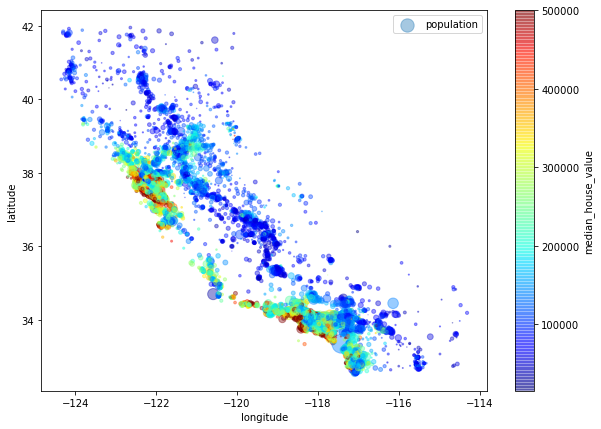

In [24]:
# 원의 반지름은 구역의 인구를 나타낸다(매개변수 s)
# 색상은 가격을 나타낸다(매개변수 c)
# 낮은가격이 파란색, 높은 가격이 빨간색으로 변하는 jet 컬러맵 사용(매개변수 cmap)
# sharex=False: 판다스가 x축이 나타나지 않는 오류를 방지하기 위해서

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [25]:
# 상관관계 조사
# 상관관계는 선형적인 상관관계(x가 증가하면 y는 증가하거나 감소한다)만 측정하고, 비선형적인 관계(x가 0에 가까워지면 y가 증가하는 경우)는 잡을 수 없다
# 따라서 두 축이 완전히 독립적이지 않아도 비선형 관계는 상관계수가 0으로 나타난다. 

corr_matrix=housing.corr()

In [26]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BF4A92DA0>,
      dtype=object)

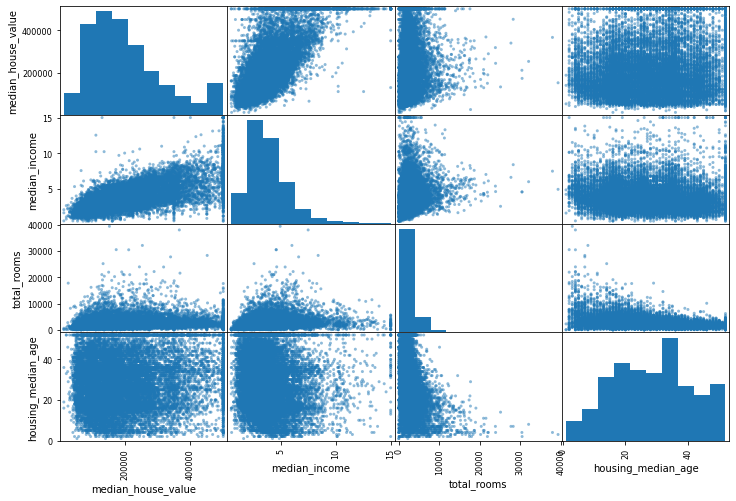

In [27]:
# 대각선 방향은 각 변수 자신에 대한 것이라 그냥 직선이 된다. 

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

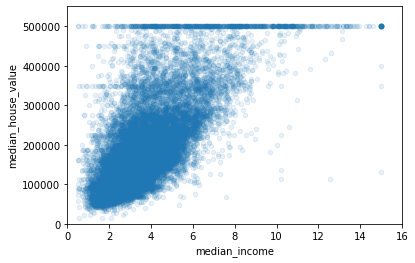

In [28]:
# 중간주택가격 예측하는데 중간 소득이 유용한 특성이라 생각하여 확대해서 시각화

housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

### 시각화 요약

1. 상관관계가 매우 강하다. 위쪽으로 향하는 경향이며 포인트들이 너무 널리 퍼져 있지 않다. 

2. 앞서 본 가격 제한값이 잘 보인다. 하지만 이 그래프에서 직선에 가까운 형태를 더 볼 수 있다. 

=> 알고리즘이 이런 이상한 형태를 학습하지 않도록 해당 구역을 제거하는 것이 좋다. 

### 특성 조합으로 실험

In [29]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 4. 머신러닝 알고리즘을 위한 데이터 준비

In [31]:
housing = strat_train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = strat_train_set["median_house_value"].copy()

In [32]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


### 결측치 처리

대부분의 머신러닝 알고리즘은 누락된 특성을 다루지 못한다. 

total_bedrooms 특성에 값이 없어 처리해야 한다. 
 
처리방법)

1. 해당 구역을 제거

2. 전체 특성을 삭제

3. 어떤 값으로 채운다(0,평균, 중간값 등)

In [33]:
# 해당 구역 제거

sample_incomplete_rows.dropna(subset=["total_bedrooms"])    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [34]:
# 전체 특성을 삭제

sample_incomplete_rows.drop("total_bedrooms", axis=1) 

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [35]:
# 중간값으로 채우겠다. 

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) 

In [36]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [37]:
# 노락된 값을 특성의 중간값으로 대체한다고 지정한 객체 생성

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [38]:
# 중간값이 수치형 특성에서만 계산될 수 있기 떄문에 텍스트 특성 제외

housing_num = housing.drop("ocean_proximity", axis=1)

# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

In [39]:
# 훈련 데이터에 적용

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [41]:
#imputer는 각 특성의 중간값을 계산하여 그 결과를 객체의 statistics_속성에 저장한다. 
# test_bedrooms 특성에만 누락된 값이 있지만 나중에 시스템이 서비스될 때 새로운 데이터에서 어떤 값이 누락될지 확신할 수 없으므로
# 모든 수치형 특성에 imputer를 적용하는 것이 바람직한다. 

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [42]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [43]:
# 학습된 imputer 객체를 사용해 훈련 세트에서 누락된 값을 학습한 중간값으로 바꿀 수 있다. 

X = imputer.transform(housing_num)

In [44]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [45]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [46]:
imputer.strategy

'median'

### 텍스트와 범주형 특성 다루기

In [47]:
# 카테고리, 즉 범주형 특성이다. 

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [48]:
# 대부분의 머신러닝 알고리즘은 숫자를 다루므로 이 카테고리를 숫자로 변환

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [49]:
# categories_인스턴스 변수를 사용해 카테고리 목록을 얻을 수 있다. 
# 범주형 특성마다 ID 배열을 담은 리스트가 반환된다. 
# 범주형 특성 1개만 있으니 배열 하나를 담은 리스트가 반환된다. 


ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 문제점

머신러닝 알고리즘이 가까이 있는 두 값이 떨어져 있는 두 값보다 더 비슷하다고 생각한다. 

이 문제는 일반적으로 카테고리별 이진 특성을 만들어 해결한다. 

한 특성만 1이고 나머지는 0 이므로 이를 원-핫 인코딩이라고 부른다. 

이따금 새로운 특성을 더미 특성이라고도 부른다. 

### 원-핫 인코딩의 한계

카테고리 특성이 담을 수 있는 카테고리 수가 많다면 원-핫 인코딩은 많은 수의 입력 특성을 만든다. 
이는 훈련을 느리게 하고 성능을 감소시킬 수 있다. 
이러한 현상이 나타나면 범주형 입력값을 이 특성과 관련된 숫자형 특성으로 바꾸고 싶을 것이다. 

EX) 국가 코드를 국가의 인구와 1인당 GDP로 바꿀 수 있다. 

또는 각 카테고리를 임베딩이라고 부르는 학습 가능한 저차원 벡터로 바꿀 수 있다. 훈련하는 동안 각 카테고리의 표현이 학습된다. 이는 표현 학습의 한 예이다. 



In [50]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [51]:
# OneHotEncoder는 기본적으로 희소 행렬을 반환한다
# 필요하면 toarray() 메서드를 사용해 밀집 배열로 변환할 수 있다. 
# 이는 수천 개의 카테고리가 있는 범주형 특성일 경우 매우 효율적이다. 
#0을 모두 메모리에 저장하는 것은 낭비이므로 희소 행렬은 0이 아닌 원소의 위치만 저장한다. 

housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [52]:
# OneHotEncoder를 만들 때 sparse=False로 지정할 수 있습니다:

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [53]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 나만의 변환기

TransformerMixin을 상속하면 마지막 메서드가 자동으로 생성된다. fit_transfom() 메서드 하나를 가지고 있으며 이를 상속하는 모든 파이썬 클래스에 이 메서드를 제공한다. fit_transform() 메서드는 단순히 fit()와 transform()을 메서드 연결한 것이다.

또한 BaseEstimator을 상속하면(그리고 생성자에 *args나 **kargs를 사용하지 않으면) 하이퍼파라미터 튜닝에 필요한 두 메서드(get_paprms()와 set_params() 를 추가로 얻게 된다. 이 두 메서드는 사이킷런의 파이프라인과 그리드 탐색에 꼭 필요한 메서드이므로 모든 추정기와 변환기는 BaseEstimator을 상속해야 한다. 이 두 메서드는 생성자에 명시된 매개변수 만을 참고하므로 *args나 **kargs는 사용할 수 없다. 



In [54]:
# 변환기가 add_bedrooms_per_room 하이퍼파라미터 하나를 가지며 기본값을 True로 지정. 
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [55]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### 특성 스케일링

데이터에 적용할 가장 중요한 변환 중 하나. 트리 기반 알고리즘 등을 빼고는 머신러닝 알고리즘은 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않는다. 

모든 특성의 범위를 같도록 만들어주는 방법으로 min-max 스케일링과 표준화가 널리 사용된다. 

1. min-max 스케일링: 정규화라고 불리기도 한다. 0에서 1까지 범위에 들도록 값을 이동하고 스케일을 조정한다.데이터에서 최솟값을 뺀 후 최댓값과 최솟값의 차이로 나누면 된다. 사이킷런에는 이에 해당하는 MinMaxScaler 변환기를 제공한다.0과1 사이를 원하지 않는다면 feature_range 매개변수로 범위를 변경할 수 있다. 


2. 표준화: 먼저 평균을 뺸 후(그래서 표준화를 하면 항상 평균이 0이 된다) 표준편차로 나누어 결과 분포의 분산이 1이 되도록 한다. min-max 스케일링과는 달리 표준화는 범위의 상한과 하한이 없어 어떤 알고리즘에서는 문제가 될 수 있다(예를 들어 신경망은 종종 입력값의 범위로 0에서 1사이를 기대한다. 그러나 표준화는 이상치에 영향을 덜 받는다. StandardScaler 변환기가 있다. 

주의: 모든 변환기에서 스케일링은 테스트 세트가 포함된 전체 데이터가 아니고 훈련 데이터에 대해서만 fit() 메서드를 적용해야 한다. 그런 다음 훈련 세트와 테스트 세트에 대해 transform() 메서드를 사용한다. 

In [57]:
## 변환 파이프라인
# 연속된 변환을 순서대로 처리할 수 있도록 도와주는 Pipeline 클래스가 있다. 


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

## pipeline

파이프라인은 연속된 단계를 나타내는 이름/ 추정기 쌍의 목록을 입력으로 받는다. 
마지막 단계에는 변환기와 추정기 모두 사용할 수 있고, 그 외에는 모두 변환기여야 한다. 
즉 fit_transform() 메서드를 가지고 있거나 fit()과 transform() 메서드만 가지고 있어도 된다. 

이름은 (고유하고 이중 밑줄 문자인__를 포함하지 않는다면) 무엇이든 상관없다. 

파이프라인의 fit() 메서드를 호출하면 모든 변환기의 fit_transform() 메서드를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달한다. 마지막 단계에서는 fit() 메서드만 호출한다. 

In [59]:
# ColumnTransformer: 하나의 변환기로 각 열마다 적절한 변환을 적용하여 모든 열을 처리할 수 있도록 하는 기능. 

from sklearn.compose import ColumnTransformer #ColumnTransformer 임포트

num_attribs = list(housing_num) # 수치형 열 이름의 리스트
cat_attribs = ["ocean_proximity"] #범주형 열 이름의 리스트 만들기

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #수치형 열은 앞서 정의한 num_pipeline 사용해 변환
        ("cat", OneHotEncoder(), cat_attribs), #범주형 열은 원0핫 인코더를 사용해 변환.
    ])

housing_prepared = full_pipeline.fit_transform(housing) #ColumnTransformer를 주택 데이터에 적용. 

# 원핫인코더는 희소행렬을 반환하지만 num_pipeline은 밀집 행렬을 반환한다. 
# 희소행렬과 밀집 행렬이 섞여 있을 떄 ColumnTransformer는 최종 행렬의 밀접 정도를 추정한다. 
# 밀접도가 임곗값(기본적으로 sparese_threshold=0.3)보다 낮으면 희소 행렬을 반환하고, 반매는 밀집 행렬을 반환한다. 

In [60]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [61]:
housing_prepared.shape

(16512, 16)

# 5. 모델 선택과 훈련

In [63]:
# 선형 회귀 모델 훈련

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))

예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [65]:

print("레이블:", list(some_labels))

레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [66]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [67]:
# 사이킷런의 mean_square_error 함수를 사용해 전체 훈련 세트에 대한 회귀 모델 RMSE 측정

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions) # 평균 절대 오차
lin_rmse = np.sqrt(lin_mse) #평균 제곱근 오차
lin_rmse

68628.19819848923

In [68]:
#훈련 데이터에 과소적합한 사레. 특성들이 좋은 예측을 만들 만큼 충분한 정보를 제공하지 못했거나 모델이 충붕히 강력하지 못했다는 것이다. 
# 더 강력한 모델을 선택하거나 훈련 알고리즘에 더 좋은 특성(로그 스케일된 인구)을 주입하거나 모델의 규제를 감소시키는 것이다. 

# 1. 강력한 모델 선택-> 의사결정나무: 강력하고 데이터에서 복잡한 비선형 관계를 찾을 수 있다. 


from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [69]:

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### 교차검증을 사용한 평가

오차가 전혀 없다고 좋은 것이 아니라 심하게 과대적합된 것이다. 
교차검증을 사용한 평가를 통해 훈련 세트의 일부는 훈련을 하고, 다른 일부분은 모델 검증에 사용된다. 
 train_test_split 함수를 사용해 훈련 세트를 더 작은 훈련 세트와 검증 세트로 나누고, 더 작은 훈련 세트에서 모델을 훈련시키고 검증 세트로 모델을 평가한다. 

In [70]:
# k-겹 교차 검증, 훈련 시트를 폴드라 불리는 10개의 서브셋으로 무작위로 분할한다. 
# 그 다음 결정 트리 모델을 10번 훈련하고 평가흐는데, 매번 다른 폴드를 선택해 평가에 사용하고
# 나머지 9개 폴드는 훈련에 사용한다. 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10) #사이킷런의 교차검증기능은 scoring 매개변수에  비용함수가 아닌 효용 함수를 기대한다. 그래서 평균 제곱 오차의 반댓값(즉 음숫값)을 계산하는 함수 사용
tree_rmse_scores = np.sqrt(-scores) #제곱근을 계산하기 전에 -scores로 부호 바꿈

In [71]:
# 결정트리 결과가 이전 만큼 좋아보이지 않다. 실제로 선형 회귀 모델보다 나쁘다. 

def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균: 71407.68766037929
표준 편차: 2439.4345041191004


In [72]:
# 선형회귀모델 교차검증 

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083
표준 편차: 2731.674001798349


In [73]:
# 랜덤포레스트 모델: 특성을 무작위로 선택해서 많은 결정 트리를 만들고 그 예측을 평균 내는 방식으로 작동한다. 
# 여러 다른 모엘을 모아서 하나의 모델을 만드는 것을 앙상블 학습이라고 하며 머신러닝 알고리즘의 성능을 극대화하는 방법 중 하나.


from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [74]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [75]:
# 과대적합-> 모델을 간단하게 하거나, 제한을 하거나(규제), 더 많은 훈련 데이터 모으기
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
평균: 50182.303100336096
표준 편차: 2097.0810550985693


In [76]:
#서포트 벡터머신 

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

# 6. 모델 세부 튜닝

그리드 탐색: 탐색하고자 하는 하이퍼파라미터와 시도해볼 값을 지정하기만 하면 된다. 
그러면 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용해 평가하게 된다. 
그리드서치가 refit=True로 초기화되었다면 교차 검증으로 최적의 추정기를 찾은 다음 전체 훈련 세트로 다시 훈련. 데이터가 많을수록 성능이 향상된다. 

또한 확실하지 않은 특성을 추가할지 말지 자동으로 정할 수 있다. 비슷하게 이상치나 값이 빈 특성을 다루거나 특성 선택 등을 자동으로 처리하는데 그리드탐색을 사용=> 데이터 준비 단계에도 사용


In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [78]:
#최상의 파라미터 조합

#이 때 8과 30은 탐색 범위의 최댓값이기 때문에 계속 점수가 향상될 가능성이 있으므로 더 큰 값으로 다시 검색

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [79]:
# 최적의 추정기에 직접 접근할 수도 있다. 
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [80]:
# 평가 점수 확인

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

## 랜덤 탐색

그리드 탐색 방법은 이전 예제와 같이 비교적 적은 수의 조합을 탐구할 때 좋다. 
하이퍼파라미터 탐색 공간이 커지면 RandomisedSerchCV를 사용하는 편이 좋다. 

RandomisedSerchCV는 그리드서치와 거의 같은 방식으로 사용하지만 가능한 모든 조합을 시도하는 대신 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가합니다. 
 
장점 1. 랜덤 탐색을 1000회 반복하도록 실행하면 하이퍼파라미터마다 각기 다른 1000개의 값을 탐색한다. 

장점 2. 단순히 반복 횟수를 조절하는 것만으로 하이퍼파라미터 탐색에 투입할 컴퓨팅 자원을 제어할 수 있다. 

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [82]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


In [83]:
## 정확한 예측을 하기 위한 각 특성의 상대적인 중요도

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [84]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [85]:
## 테스트 세트로 시스템 평가하기
# 테스트 세트에서 예측 변수와 레이블을 얻은 후 full_pipelone을 사용해 데이터를 변환하고 
# 테스트 세트에서 훈련하면 안되므로 fit_transform() 이 아니라 transform()을 호툴해야 한다. 

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [86]:
final_rmse

47730.22690385927

In [87]:
# 일반화 오차의 추정이 론칭을 결정하기에 충분하지 않을 때가 있다. 
# 0.1% 높은게 얼마나 정화해진 것인지 알 필요가 있다. 
# scipy.stats.t.interval()를 사용해 테스트 RMSE에 대한 95% 신뢰 구간을 계산할 수 있다. 


from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])